<a href="https://colab.research.google.com/github/AL-SayedHamdy/House-pricing/blob/main/House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting everything ready**

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip house-prices-advanced-regression-techniques.zip -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
replace house-prices-advanced-regression-techniques/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Importing libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# **Data preparing**


In [8]:
train_data = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')
df = train_data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


**Calculating the numerical features**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [13]:
#The shape of the numerical features
(df.describe().T).shape

(38, 8)

In [14]:
print(df.shape)

(1460, 81)


# **Visualization and analysis**

In [15]:
df['SalePrice'].describe

<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

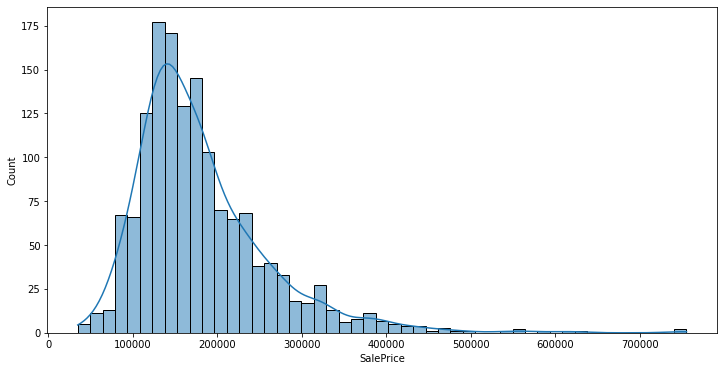

In [16]:
#Skewness of the sale price
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)

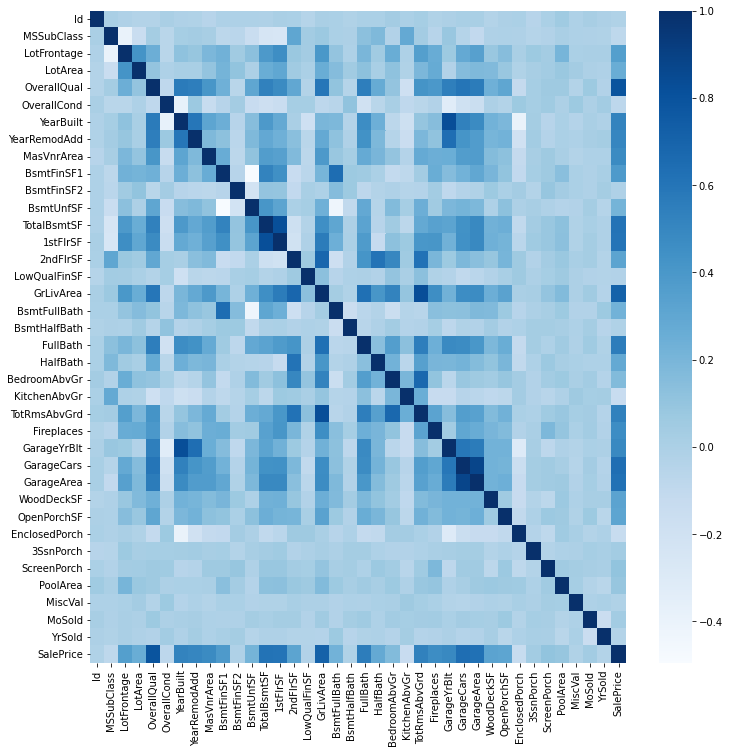

In [17]:
#Heat map to descripe the correlations between numerical varibles
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap = 'Blues')

**The features that have correlations with the sale price**

In [18]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [19]:
df.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

**Important columns which will affect the sale price**

In [20]:
imp_cols = list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.5) | (df.corr()['SalePrice']<-0.5)].index)
print(imp_cols)
print(len(imp_cols))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


In [21]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

In [22]:
#Unit the columns together
imp = imp_cols + cat_cols
print(imp)
print(len(imp))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']
18


In [23]:
df = df[imp]
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


# **Missing values**

In [24]:
df.isna()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

# **Features and prediction split**

In [26]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [27]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [28]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

**Converting categorical features to numbers**

In [29]:
X = pd.get_dummies(X, columns=cat_cols)
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


# **Standard scaler**

In [30]:
imp_col1 = imp_cols
imp_col1.remove('SalePrice')
imp_col1

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [31]:
scaler = StandardScaler()
X[imp_col1] = scaler.fit_transform(X[imp_col1])
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420,...,1,0,0,0,0,1,0,1,0,0
1457,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914,...,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,-0.704406,0.539493,0.046905,-0.218982,-0.832788,-1.026041,-0.934130,-1.026858,-1.090059,...,0,0,0,0,0,1,0,1,0,0


# **Train test split**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [33]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
254,-0.795151,-0.472560,-1.350194,0.585036,0.391697,-0.383521,-1.026041,-0.934130,-1.026858,-0.837406,...,1,0,0,0,0,1,0,1,0,0
1066,-0.071836,0.719786,0.442586,-0.589275,-0.940928,0.105723,0.789741,0.296763,0.311725,-0.435032,...,1,0,0,0,0,1,0,1,0,0
638,-0.795151,-2.029235,-1.689368,-0.596115,-0.948691,-1.369623,-1.026041,-1.549576,-2.365440,-2.212963,...,1,0,0,0,0,1,0,1,0,0
799,-0.795151,-1.134975,-1.689368,-0.744329,-0.469981,0.480746,-1.026041,0.296763,-1.026858,-1.090059,...,0,0,0,0,0,1,0,1,0,0
380,-0.795151,-1.565545,-1.689368,-0.071666,-0.353538,0.334164,0.789741,-0.318683,-1.026858,-0.771903,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.071836,1.150356,1.024029,0.585036,0.391697,-0.383521,0.789741,-0.318683,0.311725,-0.154306,...,0,0,0,0,0,1,0,1,0,0
1130,-1.518467,-1.433062,-1.689368,0.147235,0.427923,0.886229,0.789741,0.296763,0.311725,0.482006,...,0,0,0,0,0,1,0,1,0,0
1294,-0.795151,-0.538802,0.248772,-0.441061,-0.772733,-1.240174,-1.026041,-0.934130,0.311725,0.463291,...,1,0,0,0,0,1,0,1,0,0
860,0.651479,-1.764269,0.636400,-0.331610,-0.648527,-0.170310,-1.026041,0.296763,-1.026858,-1.202350,...,0,0,0,0,0,1,0,1,0,0


In [34]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
892,-0.071836,-0.273836,0.878668,0.003581,-0.244858,-0.851824,-1.026041,-0.318683,-1.026858,-0.977769,...,1,0,0,0,0,1,0,1,0,0
1105,1.374795,0.752907,0.491040,0.924788,0.872994,2.106483,0.789741,1.527656,0.311725,1.118318,...,0,0,0,0,0,1,0,1,0,0
413,-0.795151,-1.466183,-1.689368,-0.112710,-0.348363,-0.927971,-1.026041,-0.934130,0.311725,-0.528608,...,1,0,0,0,0,1,0,1,0,0
522,-0.071836,-0.803768,-1.689368,-0.121831,-0.410466,0.282764,0.789741,0.296763,0.311725,-0.247882,...,1,0,0,0,0,1,0,1,0,0
1036,2.098110,1.183477,1.120936,1.282782,1.183509,0.199003,0.789741,-0.318683,1.650307,2.054071,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-1.518467,-1.134975,0.733308,-0.343012,-0.081838,-0.731893,-1.026041,0.296763,0.311725,0.931167,...,1,0,0,1,0,0,0,1,0,0
1361,0.651479,1.117235,0.975575,1.077563,0.950623,0.027672,0.789741,0.296763,0.311725,-0.201094,...,0,0,0,0,0,1,0,0,1,0
802,0.651479,1.117235,0.975575,-0.751170,-1.124649,-0.113199,0.789741,0.296763,0.311725,-0.294669,...,0,0,0,0,0,1,0,1,0,0
651,-1.518467,-1.035613,-1.689368,-0.689604,-1.054784,-0.010401,-1.026041,0.296763,-1.026858,-0.828048,...,1,0,0,0,0,1,0,1,0,0


In [35]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [36]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

# **Modelig**

**Functions to show the results**

In [37]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r_squared = r2_score(y,predictions)
    return mae,mse,rmse,r_squared

**XG Boost**

In [38]:
xgb = XGBRegressor(n_estimators =1000 , learning_rate = 0.01)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
# Print(predictions)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

[09:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 17706.092358732876
MSE: 759631707.947942
RMSE: 27561.417016328134
R2 Score: 0.9009648758828321
------------------------------
[09:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 28657.867891337537
